In [327]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso,LassoCV
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression,f_regression
from sklearn.feature_selection import SelectKBest,SelectPercentile
from sklearn.feature_selection import SequentialFeatureSelector as SFS,SelectFromModel
from sklearn.model_selection import (
   KFold,
    RepeatedKFold,
    LeaveOneOut,
    LeavePOut,
    StratifiedKFold,
    cross_validate,
    GridSearchCV
)

from keras import models
from keras import layers,regularizers
from tensorflow import keras
from scikeras.wrappers import KerasRegressor

In [328]:
data=pd.read_csv('house_sales.csv')
data.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
0,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
1,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
2,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
3,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
4,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


In [329]:
data.columns

Index(['DocumentDate', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction'],
      dtype='object')

In [330]:
data.isnull().sum()

DocumentDate       0
SalePrice          0
PropertyID         0
PropertyType       0
ym                 0
zhvi_px            0
zhvi_idx           0
AdjSalePrice       0
NbrLivingUnits     0
SqFtLot            0
SqFtTotLiving      0
SqFtFinBasement    0
Bathrooms          0
Bedrooms           0
BldgGrade          0
YrBuilt            0
YrRenovated        0
TrafficNoise       0
LandVal            0
ImpsVal            0
ZipCode            0
NewConstruction    0
dtype: int64

In [331]:
data.dtypes

DocumentDate        object
SalePrice            int64
PropertyID           int64
PropertyType        object
ym                  object
zhvi_px              int64
zhvi_idx           float64
AdjSalePrice       float64
NbrLivingUnits       int64
SqFtLot              int64
SqFtTotLiving        int64
SqFtFinBasement      int64
Bathrooms          float64
Bedrooms             int64
BldgGrade            int64
YrBuilt              int64
YrRenovated          int64
TrafficNoise         int64
LandVal              int64
ImpsVal              int64
ZipCode              int64
NewConstruction       bool
dtype: object

In [332]:
data['DocumentDate'].head()

0    2014-09-16
1    2006-06-16
2    2007-01-29
3    2008-02-25
4    2013-03-29
Name: DocumentDate, dtype: object

In [333]:
data['YrBuilt']=pd.to_datetime(data['YrBuilt'],format='%Y').dt.year
data.YrBuilt.head()

0    1991
1    2005
2    1947
3    1966
4    1948
Name: YrBuilt, dtype: int32

In [334]:
data.rename(columns={'ym':'YrSale'},inplace=True)
data['YrSale']=pd.to_datetime(data['YrSale']).dt.year
data.YrSale.head()

0    2014
1    2006
2    2007
3    2008
4    2013
Name: YrSale, dtype: int32

In [335]:
data['YrSaleDiff']=data['YrSale']-data['YrBuilt']
data['YrSaleDiff'].min(),data['YrSaleDiff'].max()

(-9, 114)

In [336]:
data['YrSale'].min(),data['YrSale'].max()

(2006, 2015)

In [337]:
data['YrBuilt'].min(),data['YrBuilt'].max()

(1900, 2015)

In [338]:
data[data['YrSaleDiff']==-9][['YrBuilt','YrSale']]

,YrBuilt,YrSale
1960,2015,2006
7799,2015,2006
13419,2015,2006
13901,2015,2006
14326,2015,2006
22201,2015,2006


In [339]:
index=data[data['YrSaleDiff']==-9].index
data.drop(index,inplace=True)

In [340]:
data[data['YrSaleDiff']==-9]

,DocumentDate,SalePrice,PropertyID,PropertyType,YrSale,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,YrSaleDiff


In [341]:
data[data['YrSaleDiff']==114]

,DocumentDate,SalePrice,PropertyID,PropertyType,YrSale,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,YrSaleDiff
12119,2014-09-18,614950,4232903265,Single Family,2014,405100,0.930836,660642.0,1,2400,...,3,7,1900,0,0,312000,351000,98119,False,114
13447,2014-10-20,850000,5318100935,Single Family,2014,407400,0.936121,908002.0,1,3600,...,3,8,1900,1988,0,574000,314000,98112,False,114


In [342]:
data['DiscountPrice']=data['AdjSalePrice']-data['SalePrice']
data.DiscountPrice.head()

0    20805.0
1    76162.0
2    16805.0
3    17065.0
4    57065.0
Name: DiscountPrice, dtype: float64

In [343]:
data['DiscountPercentage']=round((data['DiscountPrice']/data['AdjSalePrice'])*100,2)


In [344]:
data=data.drop(['PropertyID'],axis=1)

In [345]:
data.rename(columns={'DocumentDate':'SaleDate'},inplace=True)

In [346]:
data['SaleDate']=pd.to_datetime(data['SaleDate'])
data['SaleMonth']=data['SaleDate'].dt.month
data['SaleMonth'].head()

0    9
1    6
2    1
3    2
4    3
Name: SaleMonth, dtype: int32

In [347]:
data.YrSale=pd.to_datetime(data.YrSale,format='%Y').dt.year
data.YrBuilt=pd.to_datetime(data.YrBuilt,format='%Y').dt.year

In [348]:
data.head().T

,0,1,2,3,4
SaleDate,2014-09-16 00:00:00,2006-06-16 00:00:00,2007-01-29 00:00:00,2008-02-25 00:00:00,2013-03-29 00:00:00
SalePrice,280000,1000000,745000,425000,240000
PropertyType,Multiplex,Single Family,Single Family,Single Family,Single Family
YrSale,2014,2006,2007,2008,2013
zhvi_px,405100,404400,425600,418400,351600
zhvi_idx,0.930836,0.929228,0.977941,0.961397,0.807904
AdjSalePrice,300805.0,1076162.0,761805.0,442065.0,297065.0
NbrLivingUnits,2,1,1,1,1
SqFtLot,9373,20156,26036,8618,8620
SqFtTotLiving,2400,3764,2060,3200,1720


In [349]:
data.dtypes

SaleDate              datetime64[ns]
SalePrice                      int64
PropertyType                  object
YrSale                         int32
zhvi_px                        int64
zhvi_idx                     float64
AdjSalePrice                 float64
NbrLivingUnits                 int64
SqFtLot                        int64
SqFtTotLiving                  int64
SqFtFinBasement                int64
Bathrooms                    float64
Bedrooms                       int64
BldgGrade                      int64
YrBuilt                        int32
YrRenovated                    int64
TrafficNoise                   int64
LandVal                        int64
ImpsVal                        int64
ZipCode                        int64
NewConstruction                 bool
YrSaleDiff                     int32
DiscountPrice                float64
DiscountPercentage           float64
SaleMonth                      int32
dtype: object

In [350]:
data.YrRenovated.value_counts()

YrRenovated
0       21520
2006       80
2007       80
2005       75
2008       61
        ...  
1964        1
2016        1
1973        1
1945        1
1943        1
Name: count, Length: 67, dtype: int64

In [351]:
for column in data.columns:
    print('Var name:{}'.format(column))
    print(data[column].unique())
    print('#####################')

Var name:SaleDate
<DatetimeArray>
['2014-09-16 00:00:00', '2006-06-16 00:00:00', '2007-01-29 00:00:00',
 '2008-02-25 00:00:00', '2013-03-29 00:00:00', '2009-03-30 00:00:00',
 '2013-08-28 00:00:00', '2007-05-24 00:00:00', '2006-09-22 00:00:00',
 '2006-08-22 00:00:00',
 ...
 '2014-10-23 00:00:00', '2006-01-07 00:00:00', '2015-05-12 00:00:00',
 '2006-04-29 00:00:00', '2015-03-10 00:00:00', '2014-06-28 00:00:00',
 '2010-06-06 00:00:00', '2007-08-19 00:00:00', '2009-09-19 00:00:00',
 '2009-09-26 00:00:00']
Length: 2560, dtype: datetime64[ns]
#####################
Var name:SalePrice
[ 280000 1000000  745000 ...  300900  303500  396600]
#####################
Var name:PropertyType
['Multiplex' 'Single Family' 'Townhouse']
#####################
Var name:YrSale
[2014 2006 2007 2008 2013 2009 2010 2012 2011 2015]
#####################
Var name:zhvi_px
[405100 404400 425600 418400 351600 369800 374300 432100 414800 411100
 407400 350800 403200 398100 427800 392100 428400 366100 415100 329600
 3949

### <center>Exploratory data analysis(EDA)</center>

In [352]:
eda=data.copy()

In [353]:
eda.head().T

,0,1,2,3,4
SaleDate,2014-09-16 00:00:00,2006-06-16 00:00:00,2007-01-29 00:00:00,2008-02-25 00:00:00,2013-03-29 00:00:00
SalePrice,280000,1000000,745000,425000,240000
PropertyType,Multiplex,Single Family,Single Family,Single Family,Single Family
YrSale,2014,2006,2007,2008,2013
zhvi_px,405100,404400,425600,418400,351600
zhvi_idx,0.930836,0.929228,0.977941,0.961397,0.807904
AdjSalePrice,300805.0,1076162.0,761805.0,442065.0,297065.0
NbrLivingUnits,2,1,1,1,1
SqFtLot,9373,20156,26036,8618,8620
SqFtTotLiving,2400,3764,2060,3200,1720


In [354]:
data.groupby('PropertyType')['SalePrice'].agg(['max','min','mean'])

,max,min,mean
PropertyType,,,
Multiplex,1675000,120000,499526.498054
Single Family,11000000,10480,517028.228953
Townhouse,2060000,3000,398513.367681


<Axes: xlabel='LandVal', ylabel='SalePrice'>

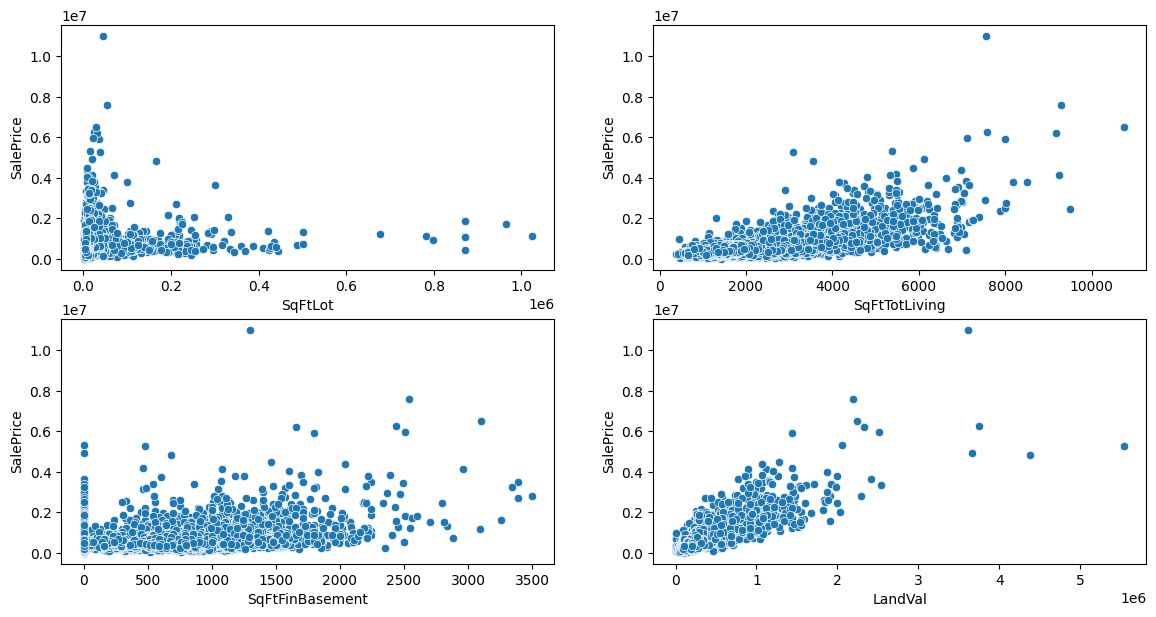

In [355]:
fig=plt.figure(figsize=(14,7))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
sns.scatterplot(data=data,x='SqFtLot',y='SalePrice',ax=ax1)
sns.scatterplot(data=data,x='SqFtTotLiving',y='SalePrice',ax=ax2)
sns.scatterplot(data=data,x='SqFtFinBasement',y='SalePrice',ax=ax3)
sns.scatterplot(data=data,x='LandVal',y='SalePrice',ax=ax4)

In [356]:
data['DiscountPercentage'].min(),data['DiscountPercentage'].max()

(0.0, 28.4)

In [357]:
discount_gt_25=data[data['DiscountPercentage']>25.0]

In [358]:
discount_gt_25.groupby('PropertyType')['SalePrice'].agg(['min','max','mean','count'])

,min,max,mean,count
PropertyType,,,,
Multiplex,157000,950000,516070.000000,20
Single Family,62000,4488000,450012.036483,1672
Townhouse,119500,905000,338064.203008,133


In [359]:
discount_gt_25.groupby(['NbrLivingUnits'])['SalePrice'].agg(['min','max','count'])

,min,max,count
NbrLivingUnits,,,
1,62000,4488000,1801
2,157000,2500000,16
3,465000,950000,8


In [360]:
discount_gt_25.groupby(['TrafficNoise'])['SalePrice'].agg(['min','max','mean','count'])

,min,max,mean,count
TrafficNoise,,,,
0,62000,4488000,443112.159439,1568
1,90000,1765000,434194.068323,161
2,67500,1600000,427621.987805,82
3,70000,2198000,566710.714286,14


In [361]:
discount_gt_25.groupby(['NewConstruction'])['SalePrice'].agg(['min','max','count'])

,min,max,count
NewConstruction,,,
False,62000,4488000,1706
True,70000,1660000,119


<Axes: ylabel='count'>

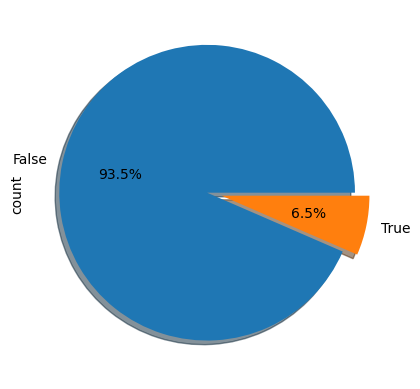

In [362]:
discount_gt_25['NewConstruction'].value_counts().plot(kind='pie',shadow=True,explode=[0.05,0.05],autopct='%1.1f%%')

<Axes: ylabel='count'>

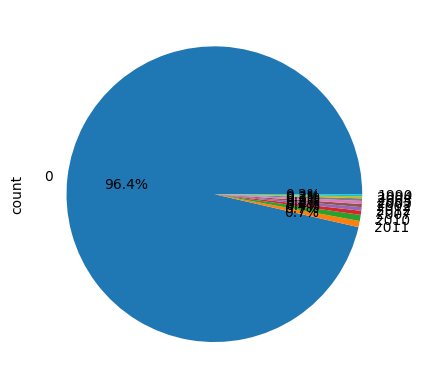

In [363]:
discount_gt_25['YrRenovated'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='YrRenovated'>

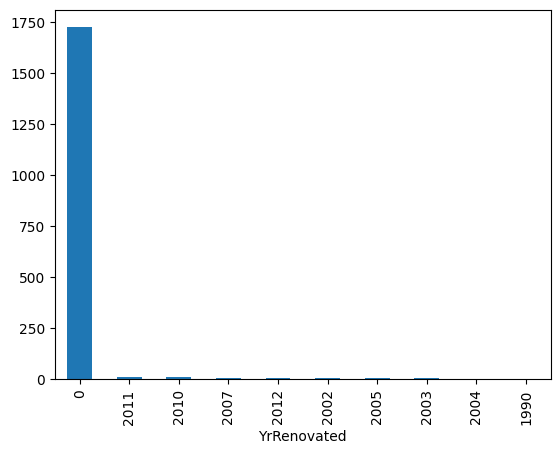

In [364]:
discount_gt_25['YrRenovated'].value_counts()[:10].plot(kind='bar')

In [365]:
data.groupby(['Bedrooms'])['SalePrice'].agg(['min','max','count']).sort_values(by='count',ascending=False)

,min,max,count
Bedrooms,,,
3,3000,3600000,10178
4,22151,4488000,7617
2,65000,3450000,2935
5,73000,5950000,1482
6,105000,11000000,246
1,10480,681900,153
7,185000,7600000,40
0,59000,570000,12
8,317000,3250000,10


<Axes: ylabel='count'>

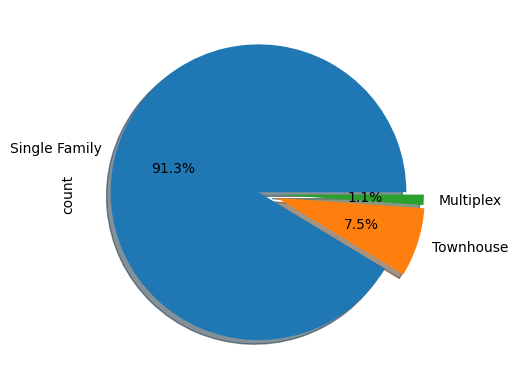

In [366]:
data['PropertyType'].value_counts().plot(kind='pie',
                                         shadow=True,
                                         explode=[0.05,0.08,0.07],
                                         autopct='%1.1f%%',
                                         )

In [367]:
data.groupby('NewConstruction')['SalePrice'].agg(['min','max','mean'])

,min,max,mean
NewConstruction,,,
False,3000,11000000,502119.617360
True,70000,6200000,556954.925198


In [368]:
top_10_expensive_by_zip=data.groupby(['ZipCode'])['SalePrice'].agg(['min','max','mean','count']).sort_values(by='max',ascending=False)[:10]
top_10_expensive_by_zip

,min,max,mean,count
ZipCode,,,,
98039,520000,11000000,1.923519e+06,47
98008,230000,7600000,6.038569e+05,291
98004,280000,6500000,1.324480e+06,292
98112,255000,6250000,9.685748e+05,356
98040,415000,6200000,1.208997e+06,243
98109,270000,4488000,7.756526e+05,149
98177,251500,4125000,5.888778e+05,216
98119,130000,3800000,7.624357e+05,260
98033,195000,3750000,7.410037e+05,517


In [369]:
list(top_10_expensive_by_zip.index)

[98039, 98008, 98004, 98112, 98040, 98109, 98177, 98119, 98033, 98074]

In [370]:
top_10_expensive_zip_df=data[data['ZipCode'].isin(list(top_10_expensive_by_zip.index))]

In [371]:
top_10_expensive_zip_df.head()

,SaleDate,SalePrice,PropertyType,YrSale,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,...,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction,YrSaleDiff,DiscountPrice,DiscountPercentage,SaleMonth
52,2006-07-11,625000,Single Family,2006,407700,0.936811,667157.0,1,7140,1690,...,0,0,541000,205000,98040,False,51,42157.0,6.32,7
53,2007-05-25,638000,Single Family,2007,432100,0.992877,642577.0,1,7140,1510,...,0,0,541000,166000,98040,False,52,4577.0,0.71,5
54,2007-10-24,705000,Single Family,2007,431300,0.991039,711375.0,1,8568,1500,...,0,0,541000,172000,98040,False,53,6375.0,0.90,10
55,2007-05-21,699500,Single Family,2007,432100,0.992877,704518.0,1,7821,3620,...,2010,0,541000,808000,98040,False,49,5018.0,0.71,5
56,2012-04-13,1285000,Single Family,2012,315200,0.724265,1774213.0,1,7821,3620,...,2010,0,541000,808000,98040,False,54,489213.0,27.57,4


In [372]:
top_10_expensive_zip_df.groupby(['PropertyType'])['SalePrice'].agg(['min','max','count'])

,min,max,count
PropertyType,,,
Multiplex,420000,1100000,22
Single Family,130000,11000000,2668
Townhouse,195000,2060000,183


In [373]:
top_10_expensive_zip_df.groupby(['NbrLivingUnits','Bedrooms'])['SalePrice'].agg(['min','max','count'])

min       max  count
NbrLivingUnits Bedrooms                          
1              1          195000    681900     14
               2          130000   3450000    227
               3          222500   3600000   1109
               4          200000   4488000   1127
               5          330000   5900000    301
               6          360000   6500000     45
               7          579500   7600000      9
               8          900000    900000      1
               11         440000    440000      1
2              3          515000   2125000      6
               4          496000    760500     13
               5          355000   5950000      9
               6         1500000  11000000      3
               8         3250000   3250000      1
3              3          632500    632500      1
               4          584500    584500      1
               5          575000   1100000      4
               7          760000    760000      1

<Axes: ylabel='count'>

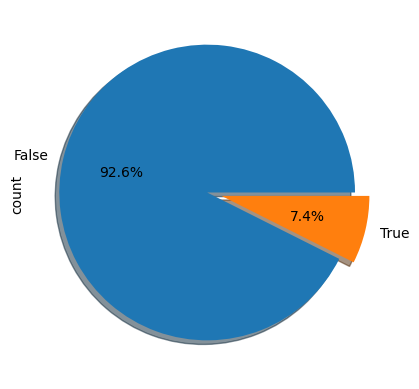

In [374]:
top_10_expensive_zip_df['NewConstruction'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0.05,0.05])

<Axes: xlabel='LandVal', ylabel='SalePrice'>

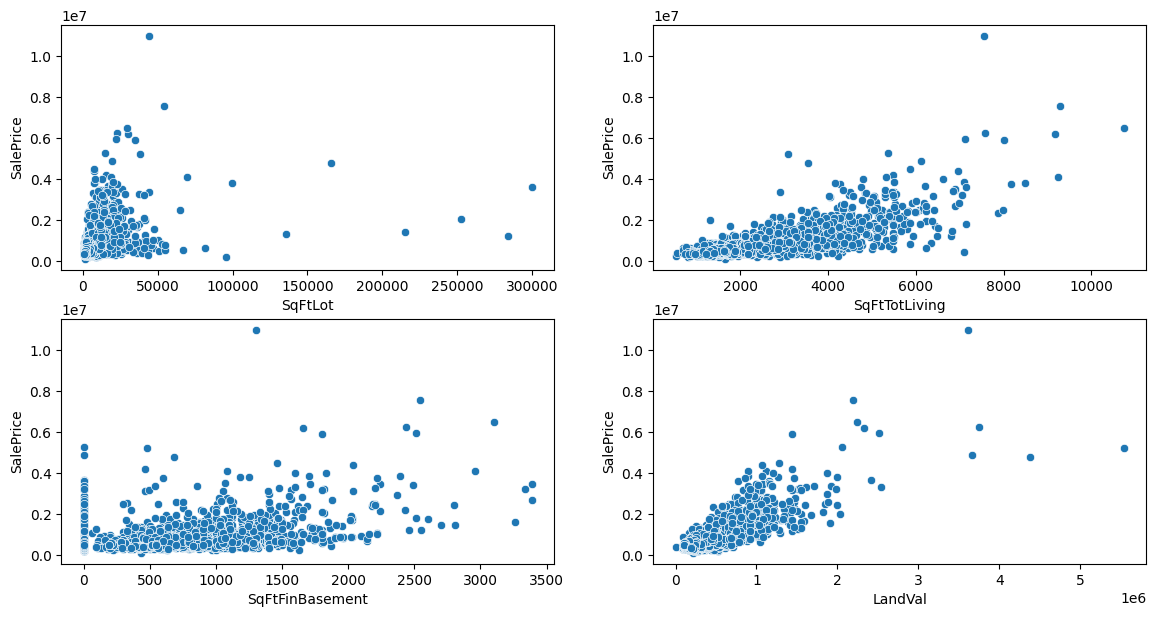

In [375]:
fig=plt.figure(figsize=(14,7))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

sns.scatterplot(data=top_10_expensive_zip_df,x='SqFtLot',y='SalePrice',ax=ax1)
sns.scatterplot(data=top_10_expensive_zip_df,x='SqFtTotLiving',y='SalePrice',ax=ax2)
sns.scatterplot(data=top_10_expensive_zip_df,x='SqFtFinBasement',y='SalePrice',ax=ax3)
sns.scatterplot(data=top_10_expensive_zip_df,x='LandVal',y='SalePrice',ax=ax4)

<Axes: xlabel='YrRenovated'>

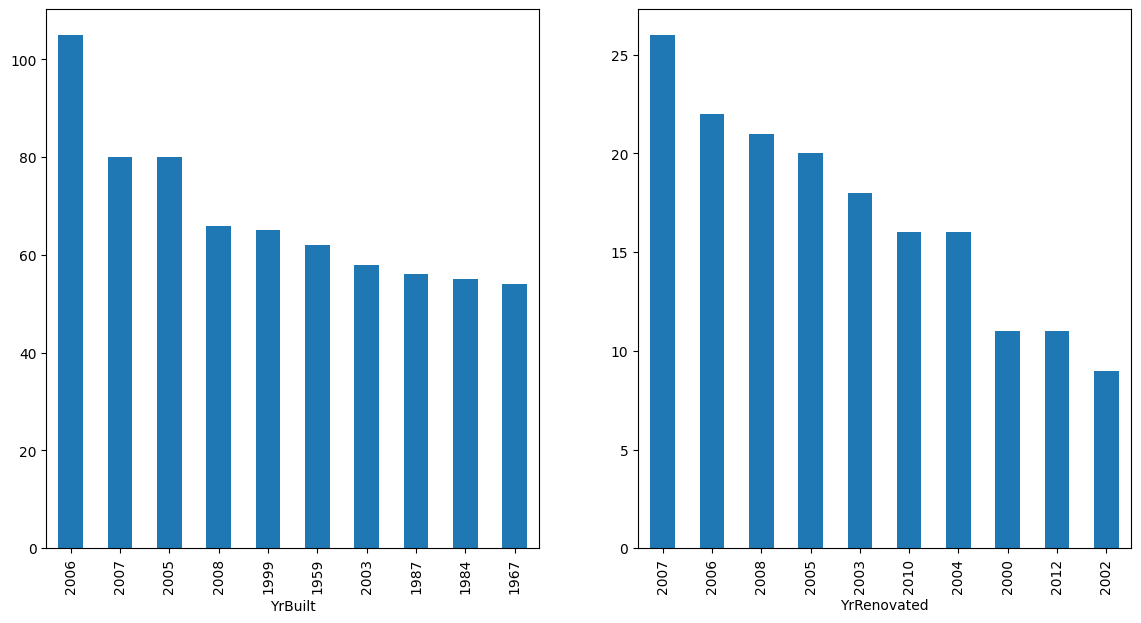

In [376]:
fig=plt.figure(figsize=(14,7))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
top_10_expensive_zip_df['YrBuilt'].value_counts()[:10].sort_values(ascending=False).plot(kind='bar',ax=ax1)
top_10_expensive_zip_df[top_10_expensive_zip_df['YrRenovated']!=0]['YrRenovated'].value_counts()[:10].sort_values(ascending=False).plot(kind='bar',ax=ax2)


In [377]:
data['PropertyType'].value_counts()

PropertyType
Single Family    20716
Townhouse         1708
Multiplex          257
Name: count, dtype: int64

In [378]:
data[data['PropertyType']=='Single Family'].sort_values(by='SalePrice')['ZipCode'].value_counts()[:10]

ZipCode
98038    747
98042    627
98052    599
98115    574
98117    556
98034    550
98074    502
98033    499
98059    495
98118    467
Name: count, dtype: int64

In [379]:
data[data['PropertyType']=='Townhouse'].sort_values(by='SalePrice')['ZipCode'].value_counts()[:10]

ZipCode
98103    181
98107    128
98122    108
98106     93
98144     91
98053     85
98133     85
98029     74
98126     71
98117     54
Name: count, dtype: int64

In [380]:
data[data['PropertyType']=='Multiplex'].sort_values(by='SalePrice')['ZipCode'].value_counts()[:10]

ZipCode
98103    29
98107    20
98102    14
98115    11
98122    11
98055    11
98056    11
98168    10
98144    10
98002    10
Name: count, dtype: int64

<Axes: xlabel='ZipCode'>

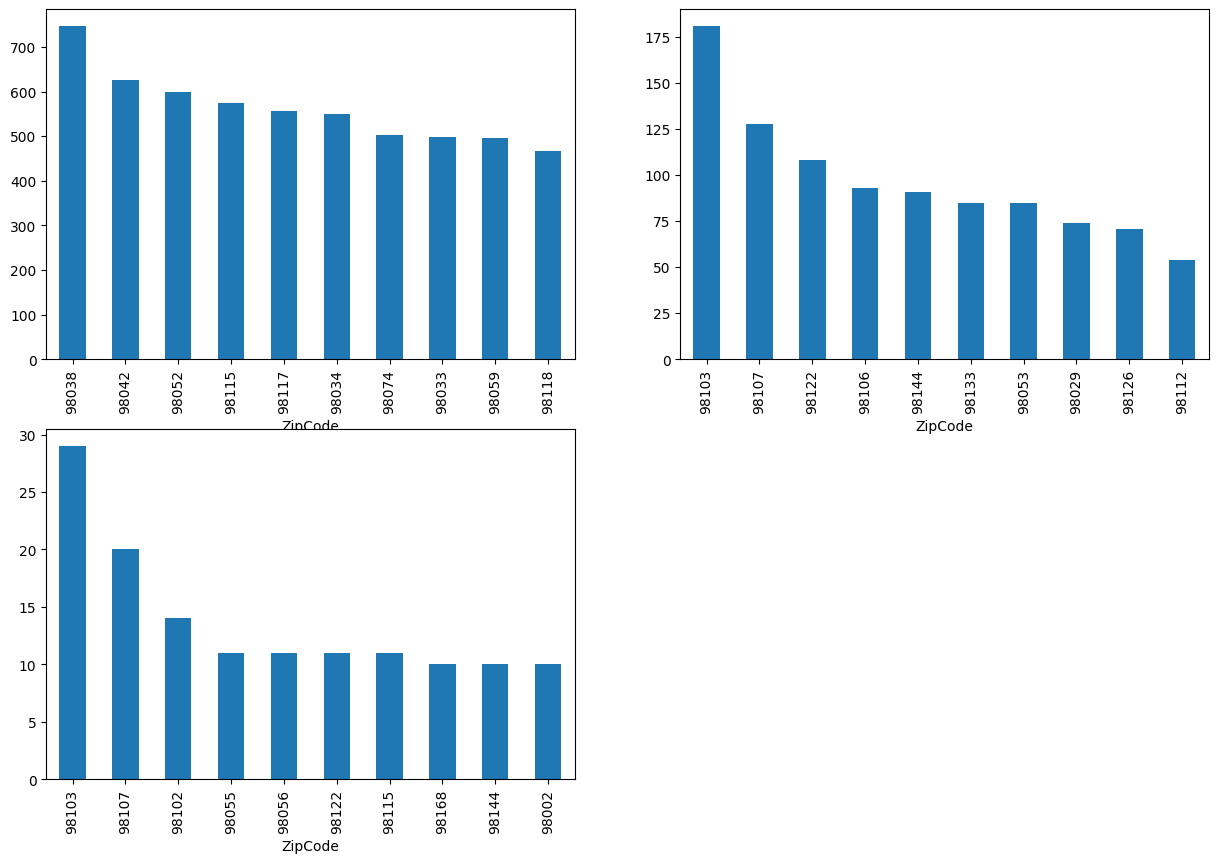

In [381]:
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)

data[data['PropertyType']=='Single Family'].sort_values(by='SalePrice',ascending=False)['ZipCode'].value_counts()[:10].plot(
    kind='bar',ax=ax1
)

data[data['PropertyType']=='Townhouse'].sort_values(by='SalePrice',ascending=False)['ZipCode'].value_counts()[:10].plot(
    kind='bar',ax=ax2
)
data[data['PropertyType']=='Multiplex'].sort_values(by='SalePrice',ascending=False)['ZipCode'].value_counts()[:10].plot(
    kind='bar',ax=ax3
)

In [382]:
data['BldgGrade'].value_counts().sort_values()

BldgGrade
3        1
4       12
13      18
12     121
5      198
11     438
10    1205
6     2109
9     2822
8     6256
7     9501
Name: count, dtype: int64

In [383]:
data.groupby('BldgGrade')['SalePrice'].agg(['max','min','mean','count']).sort_values(by='max',ascending=False)

,max,min,mean,count
BldgGrade,,,,
13,11000000,1199900,4.092233e+06,18
12,6200000,555000,2.166367e+06,121
11,5950000,150000,1.397380e+06,438
10,5250000,145000,9.396254e+05,1205
9,2600000,94000,7.118286e+05,2822
8,2350000,22151,5.019733e+05,6256
6,2000000,10480,2.951213e+05,2109
7,1525000,3000,3.807259e+05,9501
5,499000,50000,2.436976e+05,198


<Axes: xlabel='ImpsVal', ylabel='SalePrice'>

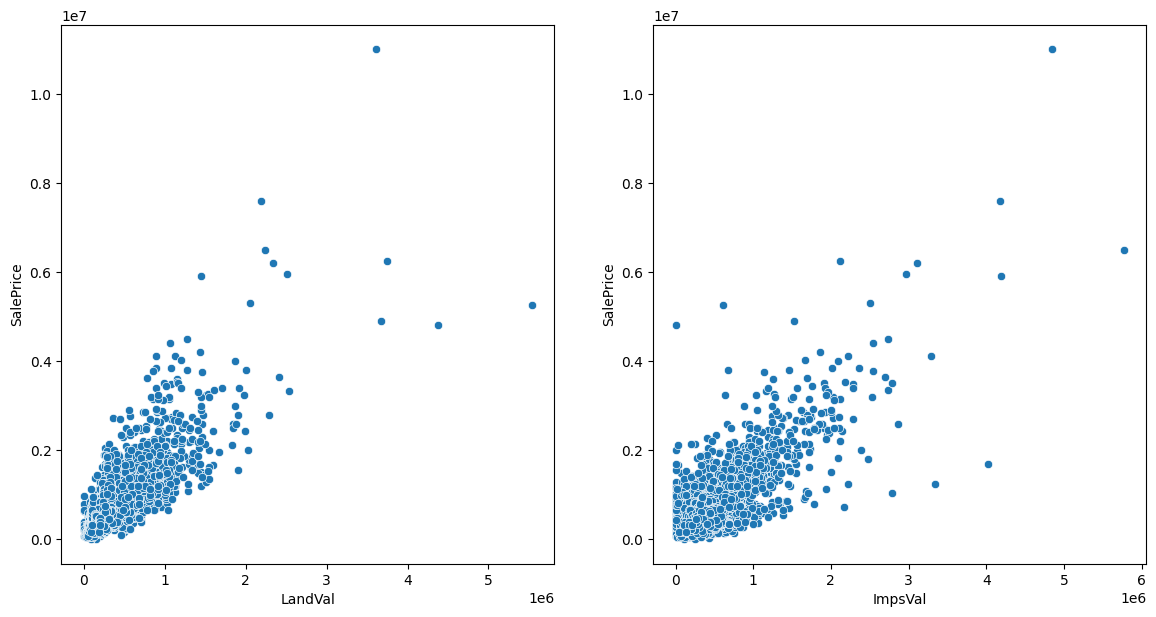

In [384]:
fig=plt.figure(figsize=(14,7))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
sns.scatterplot(data=data,x='LandVal',y='SalePrice',ax=ax1)
sns.scatterplot(data=data,x='ImpsVal',y='SalePrice',ax=ax2)

#### <center> Machine Learning </center>

In [385]:
categorical_var=['PropertyType','NewConstruction']
numrical_var=['SaleDate','SalePrice','YrSale','zhvi_px','zhvi_idx','AdjSalePrice','NbrLivingUnits','SqFtLot','SqFtTotLiving',
             'SqFtFinBasement','SqFtFinBasement','Bathrooms','BldgGrade','YrBuilt','YrRenovated','TrafficNoise','LandVal','ImpsVal',
             'ZipCode','YrSaleDiff','DiscountPrice','DiscountPercentage','SaleMonth']

In [386]:
data.head().T

,0,1,2,3,4
SaleDate,2014-09-16 00:00:00,2006-06-16 00:00:00,2007-01-29 00:00:00,2008-02-25 00:00:00,2013-03-29 00:00:00
SalePrice,280000,1000000,745000,425000,240000
PropertyType,Multiplex,Single Family,Single Family,Single Family,Single Family
YrSale,2014,2006,2007,2008,2013
zhvi_px,405100,404400,425600,418400,351600
zhvi_idx,0.930836,0.929228,0.977941,0.961397,0.807904
AdjSalePrice,300805.0,1076162.0,761805.0,442065.0,297065.0
NbrLivingUnits,2,1,1,1,1
SqFtLot,9373,20156,26036,8618,8620
SqFtTotLiving,2400,3764,2060,3200,1720


In [387]:
ml_data=data.copy()
ml_data=ml_data[ml_data['YrSaleDiff']>=0]

##### Binning (Convert to ordinal Categories)

In [388]:
# Convert YrBuilt into bins 
bins=[1900,1920,1940,1960,1980,2000,2016]
labels=[0,1,2,3,4,5]
ml_data['year_build_ordinal']=pd.cut(ml_data['YrBuilt'],bins=bins,labels=labels,right=False)

##### Calculate Time Since a Reference Year

In [389]:
# Convert YrSale into bins
reference_year=data['YrSale'].min()
ml_data['year_since_2006']=ml_data['YrSale']-reference_year

##### One-Hot Encoding for Property type and New Construction


In [390]:
X_train,X_test,y_train,y_test=train_test_split(
    ml_data.drop(['SalePrice'],axis=1),
    ml_data['SalePrice'],
    test_size=0.3,
    random_state=0)

In [391]:
ohe=OneHotEncoder(categories='auto',drop='first',sparse_output=False,handle_unknown='error').set_output(transform='pandas')

In [392]:
ct=ColumnTransformer([
    ('ohe',ohe,['PropertyType','NewConstruction'])
],remainder='passthrough',force_int_remainder_cols=False).set_output(transform='pandas')

In [393]:
ct.fit(X_train)

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['PropertyType', 'NewConstruction'])])

In [394]:
X_train_enc=ct.transform(X_train)
X_test_enc=ct.transform(X_test)

In [395]:
column_names=list(X_train_enc.columns)
rename_columns=[col.replace('ohe__','').replace('remainder__','') for col in column_names]
change_column_names=dict(zip(column_names,rename_columns))

In [396]:
X_train_enc.rename(columns=change_column_names,inplace=True)
X_test_enc.rename(columns=change_column_names,inplace=True)

In [397]:
X_test_enc.shape,y_test.shape

((6728, 27), (6728,))

##### Mean Encoding of Zip Codes

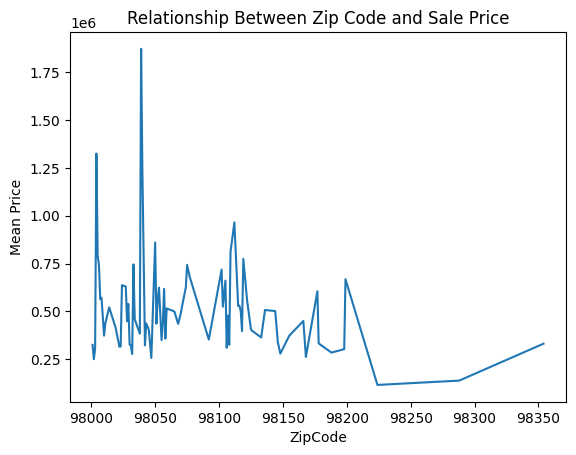

In [398]:
fig=plt.figure()
fig=y_train.groupby(X_train_enc['ZipCode']).mean().plot()
fig.set_title('Relationship Between {} and Sale Price'.format('Zip Code'))
fig.set_ylabel('Mean Price')
plt.show()

In [399]:
ordred_labels=y_train.groupby(X_train_enc['ZipCode']).mean().to_dict()
ordred_labels

{98001: 325074.63706563704,
 98002: 250716.63358778626,
 98003: 305016.3575757576,
 98004: 1325170.412087912,
 98005: 789520.6263736264,
 98006: 742788.3090909091,
 98007: 563757.3214285715,
 98008: 571584.2331606217,
 98010: 373330.0,
 98011: 438213.38181818184,
 98014: 521335.2698412698,
 98019: 416021.6,
 98022: 315246.3925925926,
 98023: 316738.96774193546,
 98024: 637415.9090909091,
 98027: 629873.8938775511,
 98028: 448239.17341040465,
 98029: 539588.6801152738,
 98030: 326660.0964467005,
 98031: 322097.8108108108,
 98032: 277071.5662650602,
 98033: 745956.7873563218,
 98034: 458934.6336633663,
 98038: 383510.5774907749,
 98039: 1872134.6153846155,
 98040: 1232988.6463414633,
 98042: 322435.7907488987,
 98043: 437515.0,
 98045: 404631.85806451616,
 98047: 256728.83333333334,
 98050: 860500.0,
 98051: 435748.5909090909,
 98052: 568049.1425178148,
 98053: 623954.6144578314,
 98055: 349845.68372093025,
 98056: 436340.81379310344,
 98057: 618000.0,
 98058: 357771.6418439716,
 98059: 

In [400]:
X_train_enc['ZipCode']=X_train_enc['ZipCode'].map(ordred_labels)
X_test_enc['ZipCode']=X_test_enc['ZipCode'].map(ordred_labels)

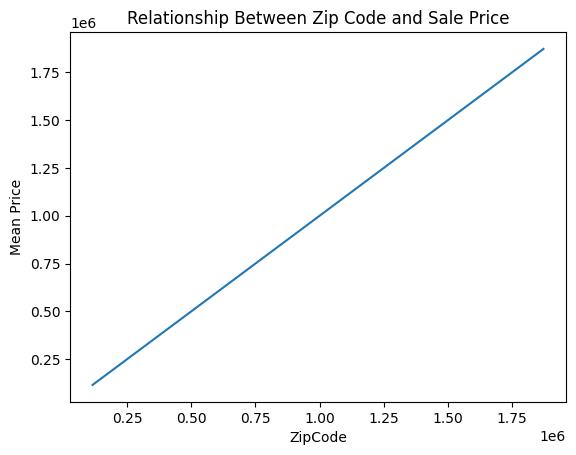

In [401]:
fig=plt.figure()
fig=y_train.groupby(X_train_enc['ZipCode']).mean().plot()
fig.set_title('Relationship Between {} and Sale Price'.format('Zip Code'))
fig.set_ylabel('Mean Price')
plt.show()

In [402]:
X_train_enc.head().T

,19149,3472,19562,8092,16890
PropertyType_Single Family,1.0,1.0,1.0,1.0,1.0
PropertyType_Townhouse,0.0,0.0,0.0,0.0,0.0
NewConstruction_True,0.0,0.0,0.0,0.0,0.0
SaleDate,2008-06-16 00:00:00,2007-10-31 00:00:00,2008-10-28 00:00:00,2013-07-23 00:00:00,2006-09-26 00:00:00
YrSale,2008,2007,2008,2013,2006
zhvi_px,403200,431300,390600,370700,414800
zhvi_idx,0.926471,0.991039,0.897518,0.851792,0.953125
AdjSalePrice,345343.0,252261.0,685167.0,437020.0,280026.0
NbrLivingUnits,1,1,1,1,2
SqFtLot,7198,7560,15078,10500,6702


In [403]:
X_train_enc=X_train_enc.drop(['SaleDate','SaleMonth','YrSale','YrBuilt'],axis=1)
X_test_enc=X_test_enc.drop(['SaleDate','SaleMonth','YrSale','YrBuilt'],axis=1)

In [404]:
X_train_enc.head().T

,19149,3472,19562,8092,16890
PropertyType_Single Family,1.000000,1.000000,1.000000,1.000000,1.000000
PropertyType_Townhouse,0.000000,0.000000,0.000000,0.000000,0.000000
NewConstruction_True,0.000000,0.000000,0.000000,0.000000,0.000000
zhvi_px,403200.000000,431300.000000,390600.000000,370700.000000,414800.000000
zhvi_idx,0.926471,0.991039,0.897518,0.851792,0.953125
AdjSalePrice,345343.000000,252261.000000,685167.000000,437020.000000,280026.000000
NbrLivingUnits,1.000000,1.000000,1.000000,1.000000,2.000000
SqFtLot,7198.000000,7560.000000,15078.000000,10500.000000,6702.000000
SqFtTotLiving,2240.000000,1160.000000,2730.000000,2060.000000,1440.000000
SqFtFinBasement,0.000000,0.000000,0.000000,700.000000,0.000000


In [405]:
var_to_scale=['zhvi_px','zhvi_idx','AdjSalePrice','SqFtLot','SqFtTotLiving','SqFtFinBasement','LandVal','ImpsVal','ZipCode','YrSaleDiff',
             'DiscountPrice','DiscountPercentage','NbrLivingUnits','Bathrooms','Bedrooms']
ordinal_var=['PropertyType_Single Family','PropertyType_Townhouse','NewConstruction_True','BldgGrade','YrRenovated','TrafficNoise','year_build_ordinal','year_since_2006']

#### Standardisation

In [406]:
scaler=StandardScaler().set_output(transform='pandas')
scaler.fit(X_train_enc[var_to_scale])

StandardScaler()

In [407]:
X_train_scaled=scaler.transform(X_train_enc[var_to_scale])
X_test_scaled=scaler.transform(X_test_enc[var_to_scale])

In [408]:
X_train_scaled.shape,X_test_scaled.shape

((15697, 15), (6728, 15))

In [409]:
X_test_enc[ordinal_var]

,PropertyType_Single Family,PropertyType_Townhouse,NewConstruction_True,BldgGrade,YrRenovated,TrafficNoise,year_build_ordinal,year_since_2006
15892,1.0,0.0,0.0,7,0,0,2,8
2013,0.0,1.0,0.0,8,0,0,5,3
2422,1.0,0.0,1.0,9,0,1,5,7
2217,1.0,0.0,0.0,8,0,0,2,6
21921,1.0,0.0,0.0,6,0,0,2,3
...,...,...,...,...,...,...,...,...
8849,1.0,0.0,0.0,10,0,0,4,5
10461,1.0,0.0,0.0,7,0,0,3,0
15614,1.0,0.0,0.0,9,0,0,2,3
774,1.0,0.0,0.0,8,1996,0,2,1


In [410]:
X_train_scaled=pd.concat([X_train_scaled,X_train_enc[ordinal_var]],axis=1)
X_test_scaled=pd.concat([X_test_scaled,X_test_enc[ordinal_var]],axis=1)

In [411]:
X_train_scaled.shape,X_test_scaled.shape

((15697, 23), (6728, 23))

In [412]:
lr=LinearRegression()
model=lr.fit(X_train_scaled,y_train)

In [413]:
df=pd.concat([X_test_scaled,y_test],axis=1)
df=df.dropna()

In [414]:
X_test_scaled=df.drop(columns=['SalePrice'],axis=1)
y_test=df['SalePrice']

In [415]:
X_test_scaled.shape,y_test.shape

((6727, 23), (6727,))

In [416]:
y_hat=model.predict(X_test_scaled)

In [417]:
r2_score(y_test,y_hat)

1.0

##### Ridge Regression

In [418]:
rr=Ridge(alpha=0.5)
model=rr.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
r2_score(y_test,y_pred)

0.9999999795120296

In [419]:
rr_cv=RidgeCV(alphas=[0.1,1.0,0.5,10.0])
model=rr_cv.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
r2_score(y_test,y_pred)

0.9999999991758608

In [420]:
model.alpha_

0.1

##### Lasso Regression

In [421]:
lasso=Lasso(alpha=0.5)
model=lasso.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
r2_score(y_test,y_pred)

0.9999996968432561

In [422]:
lasso_cv=LassoCV(alphas=[0.1,0.5,1.0,10])
model=lasso_cv.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
r2_score(y_test,y_pred)

0.9999996806407981

##### Decision Tree Regressor

In [423]:
dt=DecisionTreeRegressor(random_state=0)
model=dt.fit(X_train_enc,y_train)
y_pred=model.predict(X_test_enc)
r2_score(y_test[:1600],y_pred[:1600])

0.9946908507224266

##### Random Forest Regreesion

In [424]:
rfr=RandomForestRegressor(random_state=0,n_jobs=-1)
model=rfr.fit(X_train_enc,y_train)
y_pred=model.predict(X_test_enc)
r2_score(y_test[:1600],y_pred[:1600])

0.9991776202999524

### Feature Selection

#### 1.1 Mutual Information

In [425]:
mi=mutual_info_regression(
    X=X_train_scaled,
    y=y_train,
    n_neighbors=3,
    random_state=3
)

Text(0, 0.5, 'Mutual Information')

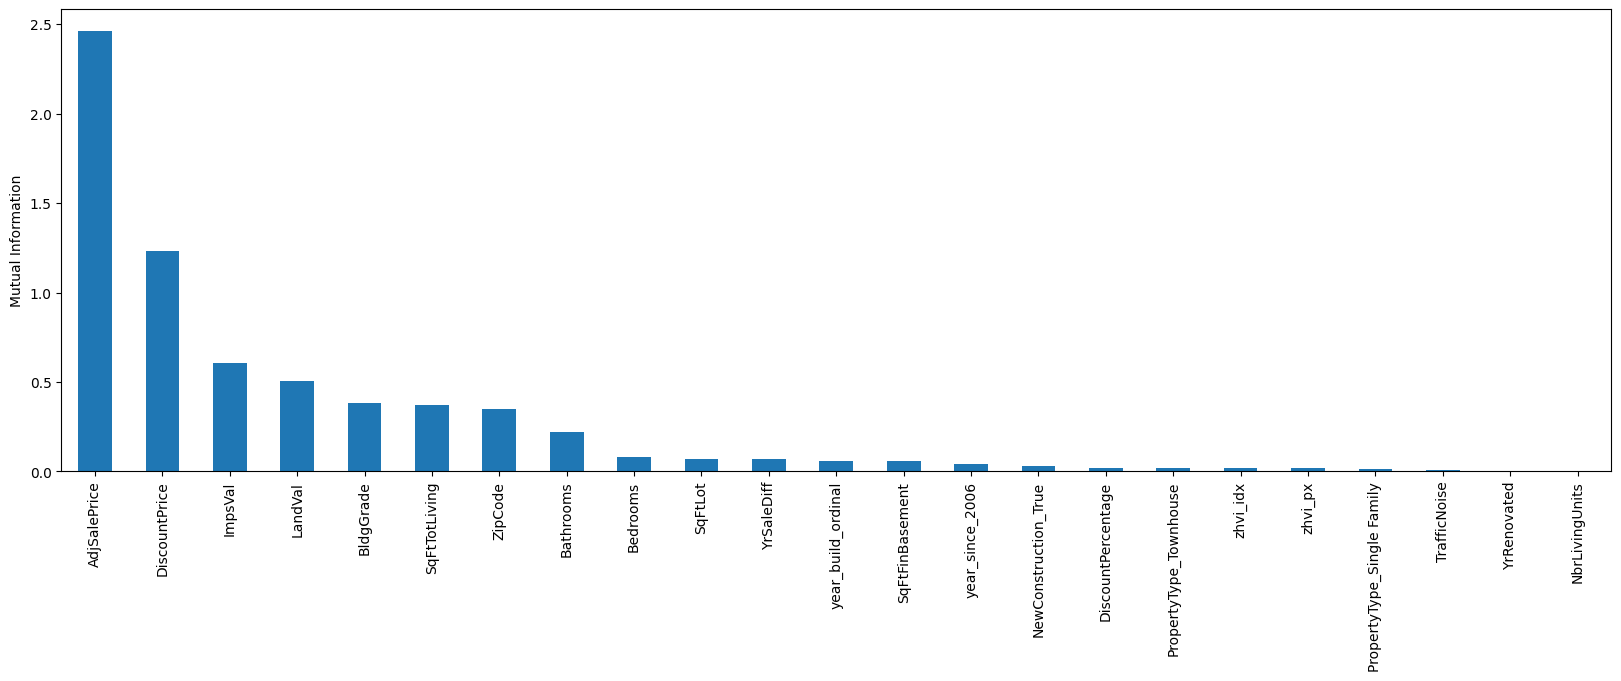

In [426]:
mi=pd.Series(mi)
mi.index=X_train_scaled.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.ylabel('Mutual Information')

In [427]:
sel_=SelectPercentile(
    mutual_info_regression,
    percentile=10
).fit(X_train_scaled,y_train)
X_train_scaled.columns[sel_.get_support()]

Index(['AdjSalePrice', 'ImpsVal', 'DiscountPrice'], dtype='object')

In [428]:
sel_15=SelectKBest(mutual_info_regression,k=15).fit(X_train_scaled,y_train)
X_train_scaled.columns[sel_.get_support()]

Index(['AdjSalePrice', 'ImpsVal', 'DiscountPrice'], dtype='object')

In [429]:
X_train_top_15=sel_15.transform(X_train_scaled)
X_test_top_15=sel_15.transform(X_test_scaled)

#### 1.2 Correlation 

In [430]:
numrical_var

['SaleDate',
 'SalePrice',
 'YrSale',
 'zhvi_px',
 'zhvi_idx',
 'AdjSalePrice',
 'NbrLivingUnits',
 'SqFtLot',
 'SqFtTotLiving',
 'SqFtFinBasement',
 'SqFtFinBasement',
 'Bathrooms',
 'BldgGrade',
 'YrBuilt',
 'YrRenovated',
 'TrafficNoise',
 'LandVal',
 'ImpsVal',
 'ZipCode',
 'YrSaleDiff',
 'DiscountPrice',
 'DiscountPercentage',
 'SaleMonth']

In [431]:
num_var=['zhvi_px',
 'zhvi_idx',
 'AdjSalePrice',
 'NbrLivingUnits',
 'SqFtLot',
 'SqFtTotLiving',
 'SqFtFinBasement',
 'SqFtFinBasement',
 'Bathrooms',
 'BldgGrade',
 'YrRenovated',
 'TrafficNoise',
 'LandVal',
 'ImpsVal',
 'ZipCode',
 'YrSaleDiff',
 'DiscountPrice',
 'DiscountPercentage']

In [432]:
statistics=f_regression(X_train_scaled[num_var],y_train)
statistics

(array([1.62382577e+02, 1.62382577e+02, 5.14257796e+05, 7.36944307e+00,
        2.68742865e+02, 1.56260661e+04, 1.56290229e+03, 1.56290229e+03,
        6.22194017e+03, 1.35339579e+04, 1.77330610e+02, 6.58867237e-01,
        2.88440153e+04, 4.08590623e+04, 7.96188994e+03, 1.12149460e+02,
        4.10147350e+03, 1.62379070e+02]),
 array([5.20588277e-37, 5.20588277e-37, 0.00000000e+00, 6.64139850e-03,
        6.70755737e-60, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.06636534e-40, 4.16972446e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.05920411e-26,
        0.00000000e+00, 5.21498145e-37]))

In [433]:
corr_coeff={
     feat:np.corrcoef(X_train_scaled[feat],y_train)[0,1] for feat in X_train_scaled.columns
}
corr_coeff

{'zhvi_px': 0.10119381355076587,
 'zhvi_idx': 0.10119381355076587,
 'AdjSalePrice': 0.985080785882923,
 'SqFtLot': 0.12974813055514642,
 'SqFtTotLiving': 0.7063282238487611,
 'SqFtFinBasement': 0.30093445241065697,
 'LandVal': 0.8047436397817436,
 'ImpsVal': 0.8499870221174017,
 'ZipCode': 0.5801352573130071,
 'YrSaleDiff': -0.08423097238022774,
 'DiscountPrice': 0.4551725240118081,
 'DiscountPercentage': -0.10119273189880955,
 'NbrLivingUnits': 0.02166380503786973,
 'Bathrooms': 0.5328107202464392,
 'Bedrooms': 0.31188877178959074,
 'PropertyType_Single Family': 0.08385855067789733,
 'PropertyType_Townhouse': -0.09074883814394531,
 'NewConstruction_True': 0.05471179853820235,
 'BldgGrade': 0.6804649252949747,
 'YrRenovated': 0.10569915219273382,
 'TrafficNoise': -0.0064790179110638,
 'year_build_ordinal': 0.08111564897230358,
 'year_since_2006': -0.06688920268284987}

[]

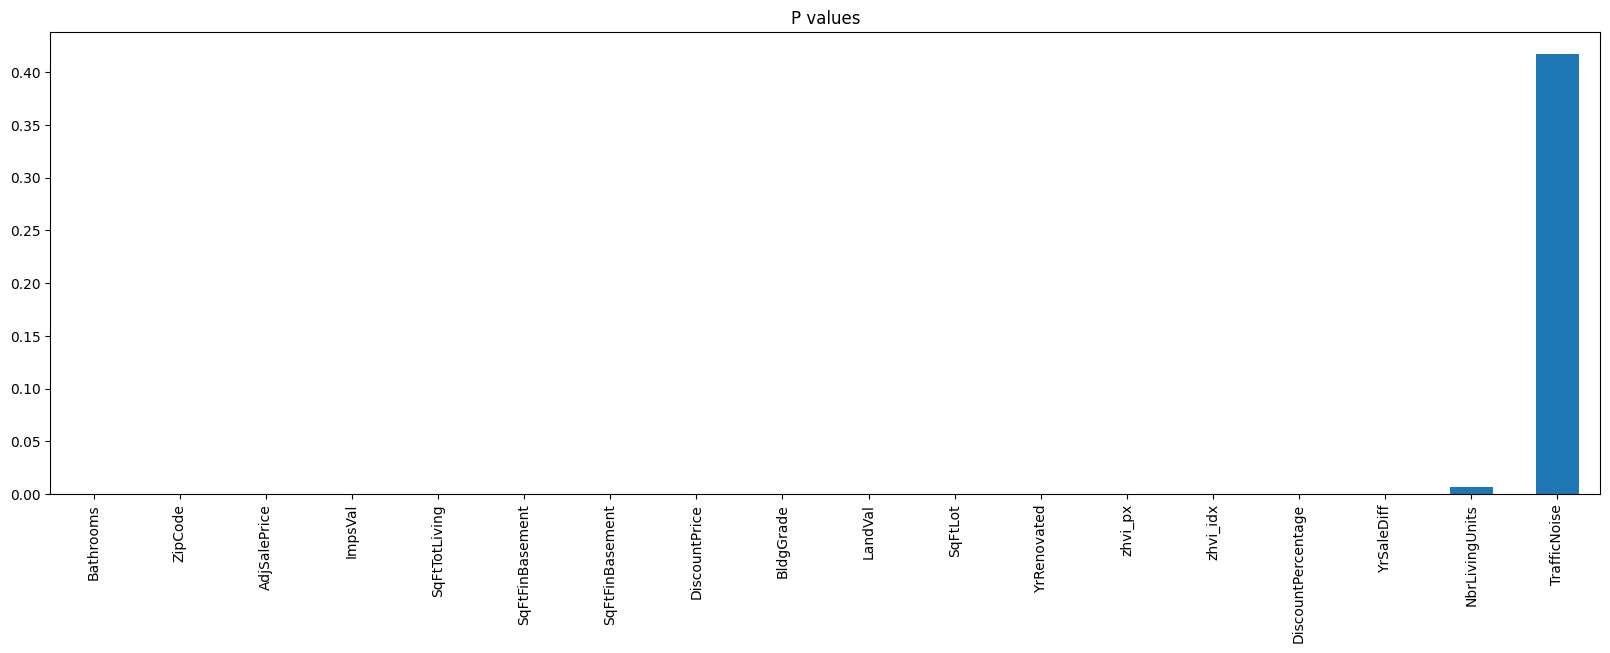

In [434]:
pd.Series(statistics[1],index=X_train_scaled[num_var].columns).sort_values(ascending=True).plot.bar(figsize=(20,6))
plt.title('P values')
plt.plot()

[]

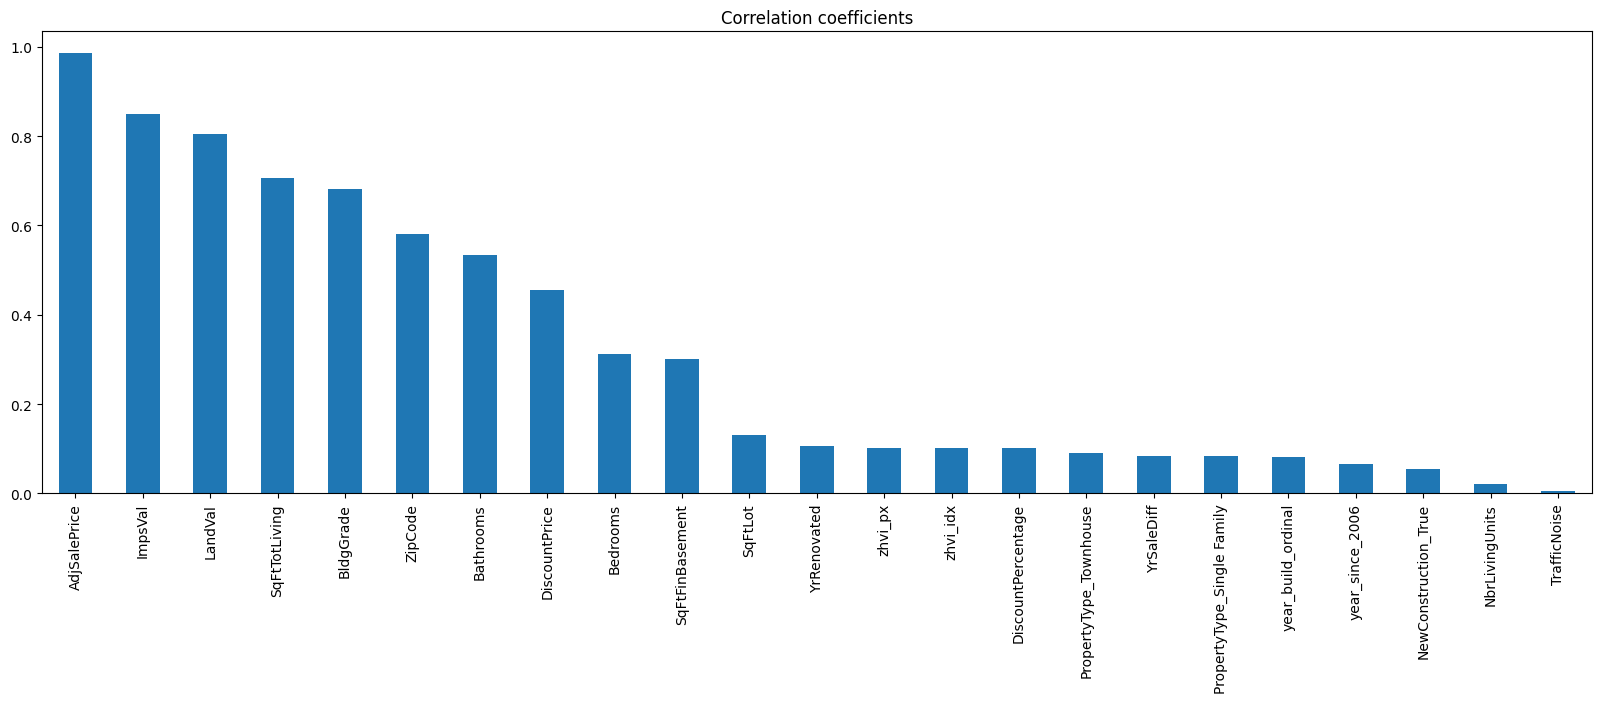

In [435]:
pd.Series(corr_coeff).abs().sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.title('Correlation coefficients')
plt.plot()

In [436]:
sel_=SelectKBest(f_regression,k=10).fit(X_train_scaled[num_var],y_train)
top_10_corr_num=X_train_scaled[num_var].columns[sel_.get_support()]
top_10_corr_num

Index(['AdjSalePrice', 'SqFtTotLiving', 'SqFtFinBasement', 'SqFtFinBasement',
       'Bathrooms', 'BldgGrade', 'LandVal', 'ImpsVal', 'ZipCode',
       'DiscountPrice'],
      dtype='object')

#### 1.3 Step Forward Feature Selection

In [437]:
sfs=SFS(
    estimator=Ridge(alpha=0.1),
    n_features_to_select=15,
    tol=None,
    direction='forward',
    scoring='r2',
    cv=2,
    n_jobs=4
)
sfs=sfs.fit(X_train_scaled,y_train)

/home/orion/.local/share/pipx/venvs/notebook/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator Ridge from version 1.6.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/orion/.local/share/pipx/venvs/notebook/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator Ridge from version 1.6.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/orion/.local/share/pipx/venvs/notebook/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator Ridge from v

In [438]:
selected_features=sfs.get_feature_names_out()


In [439]:
def runRidge(X_train,X_test,y_train,y_test):
    rr=Ridge(alpha=0.1)
    rr.fit(X_train,y_train)
    print('Train Set')
    pred=rr.predict(X_train)
    print('Lasso r2: {}'.format(r2_score(y_train,pred)))
    print('Test Set')
    pred=rr.predict(X_test)
    print('Lasso r2 : {}'.format(r2_score(y_test,pred)))



In [440]:
selected_features

array(['AdjSalePrice', 'SqFtLot', 'SqFtFinBasement', 'YrSaleDiff',
       'DiscountPrice', 'NbrLivingUnits', 'Bathrooms', 'Bedrooms',
       'PropertyType_Single Family', 'PropertyType_Townhouse',
       'NewConstruction_True', 'YrRenovated', 'TrafficNoise',
       'year_build_ordinal', 'year_since_2006'], dtype=object)

In [441]:
runRidge(X_train_scaled,X_test_scaled,y_train,y_test)

Train Set
Lasso r2: 0.9999999992152968
Test Set
Lasso r2 : 0.9999999991796565


In [442]:
runRidge(X_train_scaled[selected_features],X_test_scaled[selected_features],y_train,y_test)

Train Set
Lasso r2: 0.9999999998496687
Test Set
Lasso r2 : 0.9999999998444682


#### 1.4  Linear Regression Coff

In [443]:
sel_lr=SelectFromModel(LinearRegression())
sel_lr.fit(X_train_scaled,y_train)


SelectFromModel(estimator=LinearRegression())

In [444]:
selected_feat=X_train_scaled.columns[sel_lr.get_support()]
selected_feat

Index(['AdjSalePrice', 'DiscountPrice'], dtype='object')

#### Select Coff with lasso

In [445]:
sel_lasso=SelectFromModel(Lasso(alpha=0.1,random_state=0))
sel_lasso.fit(X_train_scaled,y_train)
selected_feat=X_train_scaled.columns[sel_lasso.get_support()]
selected_feat

Index(['zhvi_px', 'AdjSalePrice', 'SqFtLot', 'SqFtTotLiving',
       'SqFtFinBasement', 'LandVal', 'ImpsVal', 'ZipCode', 'YrSaleDiff',
       'DiscountPrice', 'DiscountPercentage', 'NbrLivingUnits', 'Bathrooms',
       'Bedrooms', 'PropertyType_Single Family', 'PropertyType_Townhouse',
       'NewConstruction_True', 'BldgGrade', 'YrRenovated', 'TrafficNoise',
       'year_build_ordinal', 'year_since_2006'],
      dtype='object')

### Hyperparameter Tuning

#### 1.1 K-Fold Cross Validation

In [446]:
rr=Ridge(alpha=0.1)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
clf=cross_validate(estimator=rr,X=X_train_scaled,y=y_train,cv=kf,return_train_score=True,scoring='r2')
clf['test_score']

array([1., 1., 1., 1., 1.])

In [447]:
clf['train_score']

array([1., 1., 1., 1., 1.])

#### 1.2 Repeated K-Fold

In [448]:
lasso=Lasso(alpha=10)
rkf=RepeatedKFold(n_splits=5,n_repeats=5,random_state=0)
clf=cross_validate(lasso,X=X_train_scaled,y=y_train,scoring='r2',cv=rkf,return_train_score=True)
clf['train_score']

array([0.99999992, 0.99999992, 0.99999993, 0.99999992, 0.9999999 ,
       0.99999992, 0.99999992, 0.99999992, 0.99999993, 0.99999991,
       0.99999992, 0.99999992, 0.99999993, 0.99999993, 0.9999999 ,
       0.99999991, 0.99999994, 0.99999991, 0.99999992, 0.99999992,
       0.99999992, 0.99999993, 0.99999991, 0.99999992, 0.99999991])

In [449]:
clf['test_score']

array([0.99999991, 0.99999991, 0.99999993, 0.99999992, 0.99999992,
       0.99999991, 0.99999991, 0.99999992, 0.99999993, 0.99999992,
       0.99999993, 0.99999992, 0.9999999 , 0.99999994, 0.9999999 ,
       0.9999999 , 0.99999992, 0.99999992, 0.99999992, 0.99999993,
       0.99999992, 0.99999994, 0.99999991, 0.9999999 , 0.99999991])

#### 1.3 Grid Search CV

In [450]:
lasso=Lasso(alpha=10)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
param_grid=dict(alpha=[0.1,0.5,1,10])
clf=GridSearchCV(estimator=lasso,param_grid=param_grid,scoring='r2',cv=kf,return_train_score=True)
search=clf.fit(X_train_scaled,y_train)
search.best_params_

{'alpha': 10}

In [451]:
results=pd.DataFrame(search.cv_results_)[['params','mean_test_score','std_test_score']]
results

,params,mean_test_score,std_test_score
0,{'alpha': 0.1},1.0,3.868040e-08
1,{'alpha': 0.5},1.0,4.379966e-08
2,{'alpha': 1},1.0,3.004882e-08
3,{'alpha': 10},1.0,5.756988e-09


### <center>TensorFlow</center>

In [452]:
model=models.Sequential()
model.add(keras.Input(shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(units=126,activation='relu'))
model.add(layers.Dense(units=64,activation='relu'))
model.add(layers.Dense(units=32,activation='relu'))
model.add(layers.Dense(units=1))
model.compile(loss='mse',optimizer='RMSprop',metrics=['mse'])
history=model.fit(X_train_scaled,y_train,epochs=10,verbose=0,batch_size=100,validation_data=(X_test_scaled,y_test))

In [453]:
y_pred=model.predict(X_test_scaled)

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [454]:
r2_score(y_test,y_pred)

0.8562014102935791

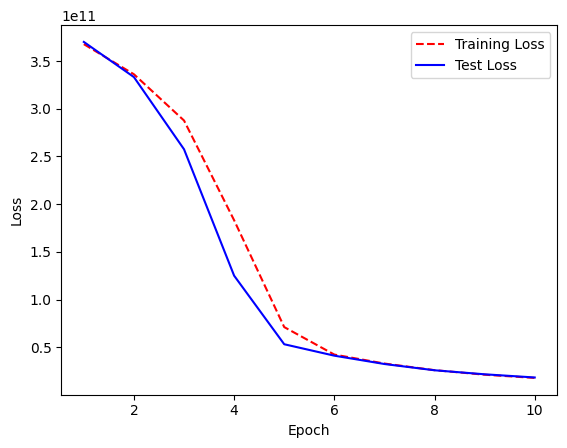

In [455]:
training_loss=history.history['loss']
test_loss=history.history['val_loss']
epoch_count=range(1,len(training_loss)+1)
plt.plot(epoch_count,training_loss,'r--')
plt.plot(epoch_count,test_loss,'b-')
plt.legend(['Training Loss','Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#### Regurlarization 

In [456]:
model=models.Sequential()
model.add(keras.Input(shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(units=126,kernel_regularizer=regularizers.L2(0.01),activation='relu'))
model.add(layers.Dense(units=126,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(layers.Dense(units=64,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(layers.Dense(units=32,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(layers.Dense(units=1))
model.compile(optimizer='RMSprop',loss='mse',metrics=['mse'])
history=model.fit(X_train_scaled,y_train,epochs=10,verbose=0,validation_data=(X_test_scaled,y_test))

In [457]:
y_pred=model.predict(X_test_scaled)
r2_score(y_test,y_pred)

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


0.9801933169364929

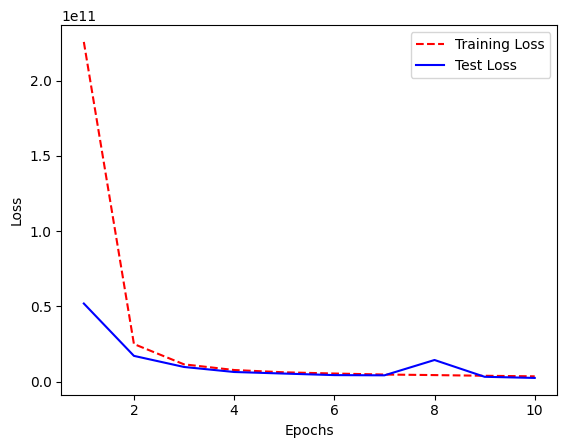

In [458]:
training_loss=history.history['loss']
test_loss=history.history['val_loss']
epoch_count=range(1,len(training_loss)+1)
plt.plot(epoch_count,training_loss,'r--')
plt.plot(epoch_count,test_loss,'b-')
plt.legend(['Training Loss','Test Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Reducing Overfitting With Dropouts

In [459]:
model=models.Sequential()
model.add(keras.Input(shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(units=124,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=32,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=1))
model.compile(optimizer='RMSprop',loss='mse',metrics=['mse'])
history=model.fit(x=X_train_scaled,y=y_train,epochs=10,verbose=1,validation_data=(X_test_scaled,y_test))

Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 367579955200.0000 - mse: 367579955200.0000 - val_loss: 330154311680.0000 - val_mse: 330154311680.0000
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 276655603712.0000 - mse: 276655603712.0000 - val_loss: 113516994560.0000 - val_mse: 113516994560.0000
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 103186898944.0000 - mse: 103186898944.0000 - val_loss: 61060554752.0000 - val_mse: 61060554752.0000
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 69308121088.0000 - mse: 69308121088.0000 - val_loss: 44105371648.0000 - val_mse: 44105371648.0000
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 64548290560.0000 - mse: 64548290560.0000 - val_loss: 35445334016.0000 - val_mse: 35445334016.0000
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 52262559744.0000 - mse: 52262559744.0000 - val_loss: 27740475392.0000 - val_mse: 27740475392.0000
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 4

In [460]:
y_pred=model.predict(X_test_scaled)
r2_score(y_test,y_pred)

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


0.860496461391449

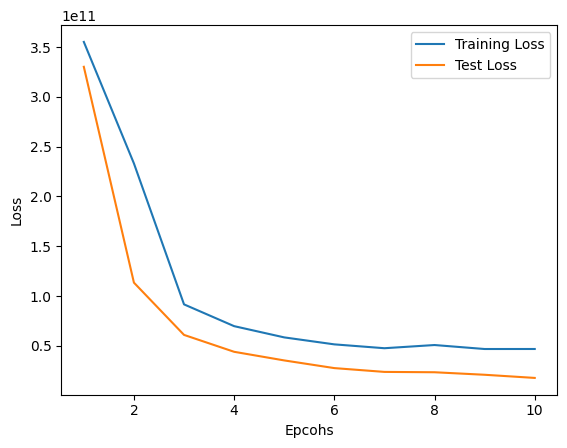

In [461]:
training_loss=history.history['loss']
test_loss=history.history['val_loss']
epochs_count=range(1,len(training_loss)+1)
plt.plot(epochs_count,training_loss)
plt.plot(epochs_count,test_loss)
plt.legend(['Training Loss','Test Loss'])
plt.xlabel('Epcohs')
plt.ylabel('Loss')
plt.show()

#### Hyperparameter Tuning

In [463]:
'''def create_netwok(optimizer='RMSprop'):
    model=models.Sequential()
    model.add(keras.Input(shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(units=124,activation='relu'))
    model.add(layers.Dense(units=64,activation='relu'))
    model.add(layers.Dense(units=32,activation='relu'))
    model.add(layers.Dense(units=1))
    model.compile(optimizer=optimizer,loss='mse',metrics=['mse'])
    return model
nn=KerasRegressor(build_fn=create_netwok,verbose=1)
epochs=[5,10]
batchs=[5,10,100]
optimizers=['rmsprop','adam']
hyperparameters=dict(optimizer=optimizers,epochs=epochs,batch_size=batchs)
grid=GridSearchCV(estimator=nn,param_grid=hyperparameters)
grid_result=grid.fit(X_train_scaled,y_train)'''

"def create_netwok(optimizer='RMSprop'):\n    model=models.Sequential()\n    model.add(keras.Input(shape=(X_train_scaled.shape[1],)))\n    model.add(layers.Dense(units=124,activation='relu'))\n    model.add(layers.Dense(units=64,activation='relu'))\n    model.add(layers.Dense(units=32,activation='relu'))\n    model.add(layers.Dense(units=1))\n    model.compile(optimizer=optimizer,loss='mse',metrics=['mse'])\n    return model\nnn=KerasRegressor(build_fn=create_netwok,verbose=1)\nepochs=[5,10]\nbatchs=[5,10,100]\noptimizers=['rmsprop','adam']\nhyperparameters=dict(optimizer=optimizers,epochs=epochs,batch_size=batchs)\ngrid=GridSearchCV(estimator=nn,param_grid=hyperparameters)\ngrid_result=grid.fit(X_train_scaled,y_train)"